In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
#Some Defatult Values
PATH = "C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR,S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR,E_MONTH, E_DAY)

risk_free_rate = 0.0125 #10Y bond rate


In [3]:
def save_df_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

#function that returns df from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', parse_dates=True)

    except FileNotFoundError:
        print(ticker,"File Does Not Exist")
        pass

    else:
        return df

#merge multiple stock in one df by column name
def merge_df_by_column_name(col_name, sdate, edate, *tick_args):
    mult_df = pd.DataFrame()
    #print(tick_args[0])
    for x in tick_args:
        #print(x)
        df = get_df_from_csv(x)
        if not df.index.is_unique:
            df = df.loc[~df.index.duplicated(),:]
            
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
    
    return mult_df
        
def add_daily_return_to_df(df, ticker):
    df['daily_return']=(df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    save_df_to_csv(df, ticker)

    return df

#function to save data to csv
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    df = yf.download(ticker, start=start, end=end)['Adj Close']

    df.to_csv("C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"+ticker+'.csv')

    return df


In [4]:
port_list = ['AMD', 'CPRT']
mult_df = merge_df_by_column_name('daily_return', '2018-01-02', '2021-09-01', *port_list)
mult_df

,AMD,CPRT
Date,,
2018-01-02,0.068093,0.009493
2018-01-03,0.051913,-0.004816
2018-01-04,0.049351,0.008066
2018-01-05,-0.019802,-0.004801
2018-01-08,0.033670,0.000459
...,...,...
2021-08-26,-0.009511,-0.006670
2021-08-27,0.038501,0.010282
2021-08-30,-0.000718,0.000069


In [5]:
#Calculating Beta = cov/vol^2

#Get SP500 and AMD data
sp_df = pd.DataFrame()

sp_df = save_to_csv_from_yahoo('^GSPC', 2017,1,3, 2021,9, 10)
sp_df = get_df_from_csv('^GSPC')
sp_df = add_daily_return_to_df(sp_df, '^GSPC')
sp_df

[*********************100%***********************]  1 of 1 completed


,Adj Close,daily_return
Date,,
2017-01-03,2257.830078,NaN
2017-01-04,2270.750000,0.005722
2017-01-05,2269.000000,-0.000771
2017-01-06,2276.979980,0.003517
2017-01-09,2268.899902,-0.003549
...,...,...
2021-09-02,4536.950195,0.002843
2021-09-03,4535.430176,-0.000335
2021-09-07,4520.029785,-0.003396


In [6]:
amd_df = get_df_from_csv('AMD')
amd_df

,Adj Close,daily_return
Date,,
2017-01-03,11.430000,NaN
2017-01-04,11.430000,0.000000
2017-01-05,11.240000,-0.016623
2017-01-06,11.320000,0.007117
2017-01-09,11.490000,0.015018
...,...,...
2021-09-02,109.199997,-0.007182
2021-09-03,109.919998,0.006593
2021-09-07,109.150002,-0.007005


In [7]:
sp_df = get_df_from_csv('^GSPC')
sp_df

,Adj Close,daily_return
Date,,
2017-01-03,2257.830078,NaN
2017-01-04,2270.750000,0.005722
2017-01-05,2269.000000,-0.000771
2017-01-06,2276.979980,0.003517
2017-01-09,2268.899902,-0.003549
...,...,...
2021-09-02,4536.950195,0.002843
2021-09-03,4535.430176,-0.000335
2021-09-07,4520.029785,-0.003396


In [8]:
save_df_to_csv(sp_df, '^GSPC')
sp_df2 = get_df_from_csv('^GSPC')
sp_df2

,Adj Close,daily_return
Date,,
2017-01-03,2257.830078,NaN
2017-01-04,2270.750000,0.005722
2017-01-05,2269.000000,-0.000771
2017-01-06,2276.979980,0.003517
2017-01-09,2268.899902,-0.003549
...,...,...
2021-09-02,4536.950195,0.002843
2021-09-03,4535.430176,-0.000335
2021-09-07,4520.029785,-0.003396


In [9]:
def find_beta(ticker): #with respect tot sp500
    port_list = ['^GSPC']
    port_list.append(ticker)
    mult_df = merge_df_by_column_name('daily_return', '2018-01-02', '2021-09-10', *port_list)
    #display(mult_df)
    cov = mult_df.cov() * 252
    cov_vs_market = cov.iloc[0,1]
    sp_var = mult_df['^GSPC'].var() *252
    beta = cov_vs_market/sp_var

    return beta

In [10]:
#Get stock beta
print("AMD beta: ", find_beta('AMD'))

AMD beta:  1.4106130636095466


In [11]:
#Capital Asset Pricing Model

#Calculate AMD expected return
ri = risk_free_rate + find_beta('AMD') * 0.05
ri

0.08303065318047734

In [12]:
amd_sharpe = (ri - risk_free_rate)/(mult_df['AMD'].std()*252**0.5)
amd_sharpe

0.1250977157870012

In [13]:
#Get stock prices on date
def get_prices_on_date(stock_df, date):
    return stock_df.loc[pd.DatetimeIndex([date])]['Adj Close'].item()

In [14]:
#Return value of portfolio by date
def get_port_value_on_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close', date, date, *tickers)
    port_prices = port_prices.values.tolist()
    port_prices = sum(port_prices, [])
    value_list = []
    for price, share in zip(port_prices, shares):
        value_list.append(price * share)

    return sum(value_list)

In [15]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR",
             "NEM", "CCI", "COF"]

port_shares = [25, 20, 22, 26, 1,1,4,1,5,28,3,7]

port_val_start = get_port_value_on_date('2020-01-02', port_shares, port_list)

print("Portfolio value at start of 2020: $%2.2f" % (port_val_start) )

port_val_end = get_port_value_on_date('2020-12-31', port_shares, port_list)

print("Portfolio value at end of 2020: $%2.2f" % (port_val_end) )

Portfolio value at start of 2020: $11205.58
Portfolio value at end of 2020: $18285.08


In [16]:
roi_port = (port_val_end-port_val_start)/port_val_end
print("Portfolio ROI at end of 2020: %2.2f" % (roi_port*100))

sp_df = get_df_from_csv('^GSPC')

sp_val_start = get_prices_on_date(sp_df,'2020-01-02')

print("S&P500 value at start of 2020: $%2.2f" % (sp_val_start) )

sp_val_end = get_prices_on_date(sp_df,'2020-12-31')

print("S&P500 value at end of 2020: $%2.2f" % (sp_val_end) )

sp_roi = (sp_val_end-sp_val_start)/sp_val_end

print("S&P500 ROI at end of 2020: %2.2f" % (sp_roi * 100))

Portfolio ROI at end of 2020: 38.72
S&P500 value at start of 2020: $3257.85
S&P500 value at end of 2020: $3756.07
S&P500 ROI at end of 2020: 13.26


In [17]:
#Find daily return of entire portfolio
def get_port_daily_return(sdate, edate, shares, tickers):
    mult_df = merge_df_by_column_name('Adj Close', sdate, edate, *tickers)
    num_cols = len(mult_df.columns)
    i = 0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x: x * shares[i])
        i += 1

    mult_df['Total'] = mult_df.iloc[:,0:num_cols].sum(axis=1)
    #display(mult_df.iloc[:,0:num_cols].sum())
    mult_df['daily_return']=(mult_df['Total'] / mult_df['Total'].shift(1))-1

    return mult_df


In [18]:
total_port_df = get_port_daily_return('2020-01-02', '2020-12-31', port_shares,port_list)
total_port_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COF,Total,daily_return
Date,,,,,,,,,,,,,,
2020-01-02,2550.250053,934.800034,2779.783554,1276.599960,271.434692,490.429993,317.845917,113.211067,334.392128,1080.039246,375.779892,681.015694,11205.582230,NaN
2020-01-03,2541.749954,926.600037,2746.633835,1263.599960,272.343475,494.470001,322.911591,112.449669,334.347076,1070.293442,377.848709,670.433502,11133.681252,-0.006417
2020-01-06,2531.250000,934.899979,2724.920013,1258.139984,277.716248,497.450012,324.846863,112.605621,340.420456,1081.039001,374.665855,664.386314,11122.340347,-0.001019
2020-01-07,2572.500038,933.700027,2732.737137,1254.500000,279.114380,499.160004,319.268799,111.908417,337.820320,1080.289291,368.326813,657.813560,11147.138786,0.002230
2020-01-08,2500.749969,940.100021,2745.620880,1243.580048,282.739502,500.769989,317.561371,112.385460,339.816780,1051.551544,369.865242,664.780769,11069.521576,-0.006963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,5829.999924,1237.099991,4319.928406,2387.059937,461.508911,656.489990,358.537506,129.458801,458.104210,1538.195953,421.238159,648.114166,18445.735954,0.012903
2020-12-28,5825.999832,1267.200012,4247.148743,2381.599960,462.966949,651.900024,358.345734,130.361206,457.218857,1521.410202,427.392609,649.779411,18381.323540,-0.003492
2020-12-29,5534.249878,1259.199982,4230.153259,2356.120071,446.988464,664.979980,363.715973,130.116821,455.215073,1519.121231,426.189102,640.653862,18026.703697,-0.019292


In [19]:
#Find portfolio beta wrt SP500
def find_port_beta(port_df, sdate, edate):
    mult_df = pd.DataFrame()
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    sp_df = get_df_from_csv('^GSPC')
    sp_mask = (sp_df.index >= sdate) & (sp_df.index <= edate)

    mult_df['GSPC'] = sp_df.loc[sp_mask]['daily_return']
    mult_df['Portfolio']=port_df.loc[port_mask]['daily_return']
    cov = mult_df.cov() *252
    cov_vs_market = cov.iloc[0,1]

    sp_var = mult_df['GSPC'].var() *252

    beta = cov_vs_market/sp_var

    return beta

In [20]:
port_beta = find_port_beta(total_port_df, '2020-01-02', '2020-12-31')
port_beta

0.9410423113728564

In [21]:
#Find alpha
def find_port_alpha(port_df, shares, tickers, sdate, edate):
    port_roi = (get_port_value_on_date(edate, shares, tickers)-get_port_value_on_date(sdate, shares, tickers))/get_port_value_on_date(edate, shares, tickers)
    beta = find_port_beta(port_df, sdate, edate)
    
    alpha = port_roi - risk_free_rate -(beta * (sp_roi - risk_free_rate))

    return alpha


In [22]:
port_alpha = find_port_alpha(total_port_df, port_shares, port_list, '2020-01-02','2020-12-31')
port_alpha

0.26161290120613107

In [67]:
#Large time period
tot_port_df = get_port_daily_return('2017-01-03', '2022-12-31', port_shares, port_list)
tot_port_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COF,Total,daily_return
Date,,,,,,,,,,,,,,
2017-01-03,1048.499966,278.600006,1241.262619,297.180008,46.407547,285.769989,168.730164,70.369560,147.351580,812.380997,205.804138,553.405457,5155.762030,NaN
2017-01-04,1050.000000,282.299995,1246.411903,297.180008,47.276379,291.549988,168.243378,70.620293,148.678713,820.122589,207.037033,562.310280,5191.730558,0.006976
2017-01-05,1027.999973,282.000008,1231.679245,292.239994,46.936832,296.170013,164.944092,71.088303,148.637228,857.891197,206.847290,550.354065,5176.788240,-0.002878
2017-01-06,1017.749977,283.400002,1231.536240,294.319992,47.426178,298.160004,164.781906,71.063240,149.425182,830.913490,202.721786,551.724190,5143.222187,-0.006484
2017-01-09,1007.250023,282.649994,1224.813560,298.739994,48.334953,296.260010,162.510269,70.536705,148.139563,829.506035,203.267120,544.500740,5116.508966,-0.005194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,11325.250244,1450.599976,6550.011902,2839.199921,500.126923,821.010010,339.993958,137.863907,471.502686,1519.077438,549.631668,1080.482086,27584.750717,0.019028
2021-09-03,11343.750000,1456.300049,6577.531372,2857.919952,495.593048,811.330017,340.148468,137.959656,470.915527,1543.916779,551.298065,1061.580612,27648.243546,0.002302
2021-09-07,11138.749695,1430.000000,6595.223755,2837.900040,482.650452,800.830017,335.861877,137.442505,461.275024,1507.951416,543.077179,1059.353165,27330.315125,-0.011499


In [68]:
#ARIMA Model (Auto Regression)
tot_port_df = tot_port_df.asfreq('d')
display(tot_port_df.index)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-12',
               ...
               '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
               '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09'],
              dtype='datetime64[ns]', name='Date', length=1711, freq='D')

,Total
Date,
2017-01-03,5155.762030
2017-01-04,5191.730558
2017-01-05,5176.788240
2017-01-06,5143.222187
2017-01-07,5143.222187
...,...
2021-09-05,27648.243546
2021-09-06,27648.243546
2021-09-07,27330.315125


Total market observations:  1711


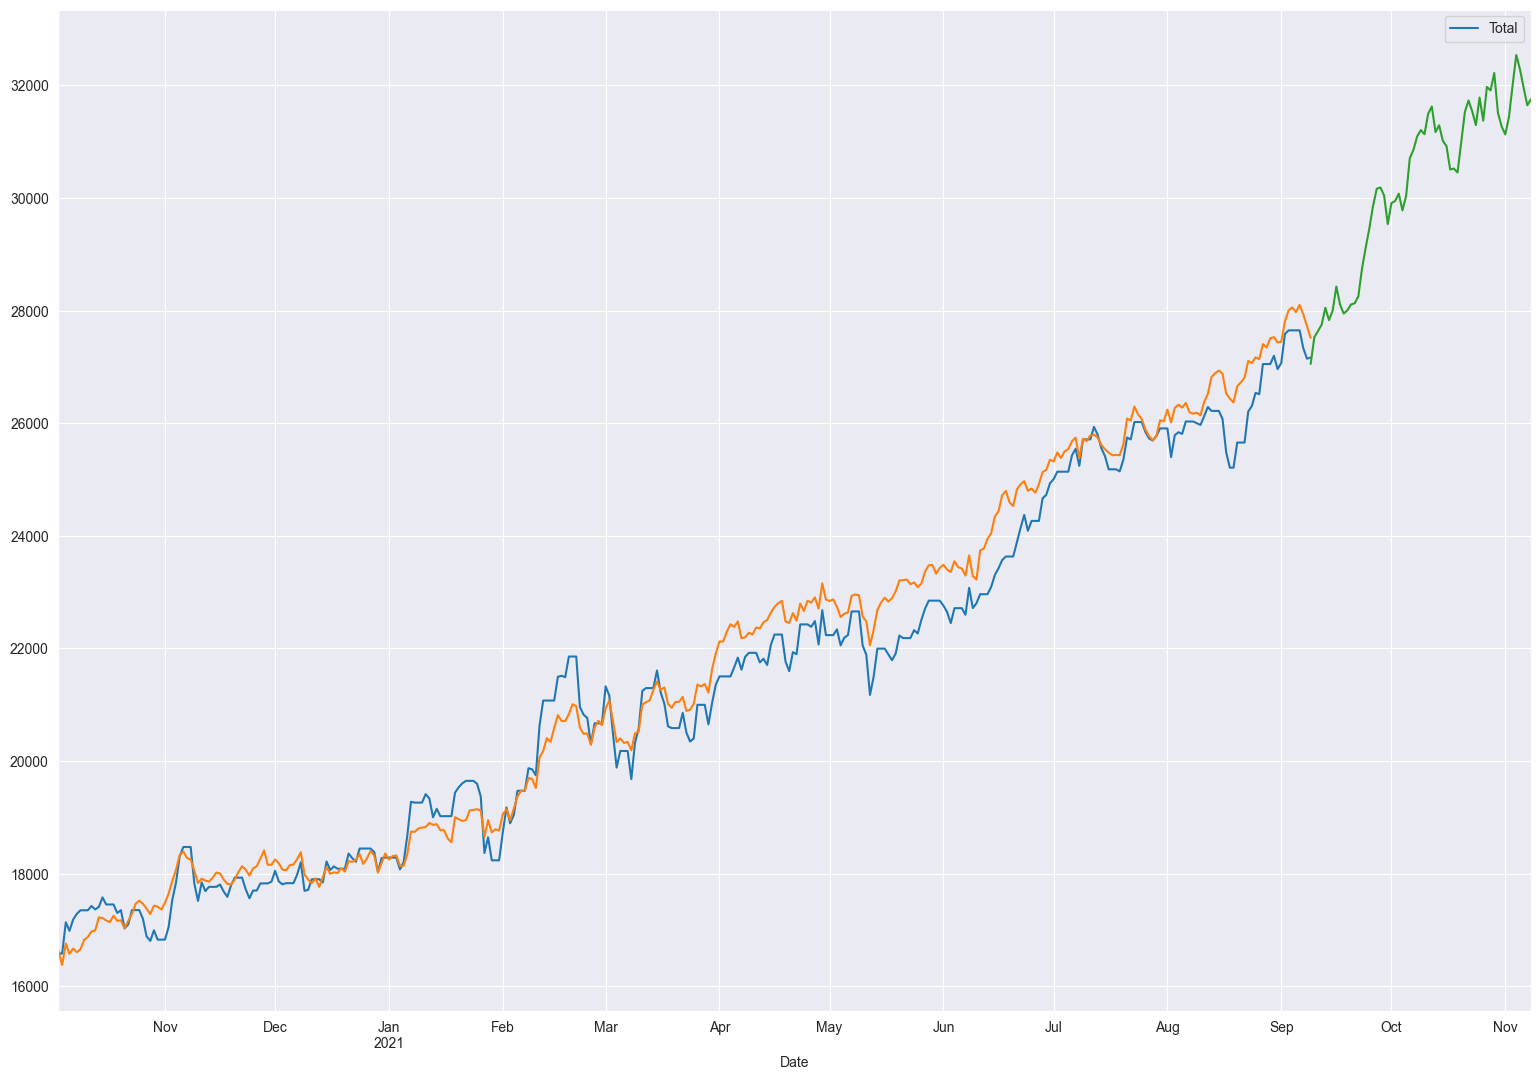

In [69]:
tot_port_df = tot_port_df.fillna(method='ffill')
#display(tot_port_df)

port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR",
             "NEM", "CCI", "COF"]

del_col = port_list + ['daily_return']

#print(del_col)

#for x in del_col:
#    print(x)
#    tot_port_df = total_port_df.drop(x, axis=1)

tot_port_df2 = tot_port_df.drop(del_col, axis=1)

display(tot_port_df2)
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(19,13))

fig, ax = plt.subplots()

lags = ar_select_order(tot_port_df2, maxlag=30)

model = AutoReg(tot_port_df2['Total'], lags.ar_lags)

model_fit = model.fit()

total_market_obs = len(tot_port_df2)
print("Total market observations: ", total_market_obs)

train_df = tot_port_df2.iloc[0:round(total_market_obs*0.8)]
test_df = tot_port_df2.iloc[round(total_market_obs*0.8):]

train_model = AutoReg(tot_port_df2['Total'], 459).fit(cov_type='HC0')

start = len(train_df)
end = len(train_df)+len(test_df)-1

prediction = train_model.predict(start, end, dynamic=True)

ax = test_df.plot(ax=ax, label= 'Test Data')
ax = prediction.plot(ax=ax, label='Projection')

forecast = train_model.predict(start=end, end=end+60, dynamic=True)

ax = forecast.plot(ax=ax, label='Forecast')

In [70]:
pip install hashlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hashlib (from versions: 20081119)
ERROR: No matching distribution found for hashlib

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\dietd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
